In [1]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
import math

start=0
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

data = pd.read_csv("./220120走路/手25sec990cm26step.csv")
data = np.array(data)
length=[]
for i in range(len(data)):
    length.append(i)
# print(len(length))
Spectrum=[]
Spectrum_index=list(range(0, 100))
index=0

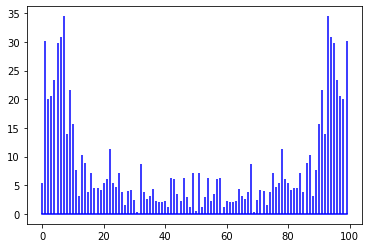

/Users/linjunting/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


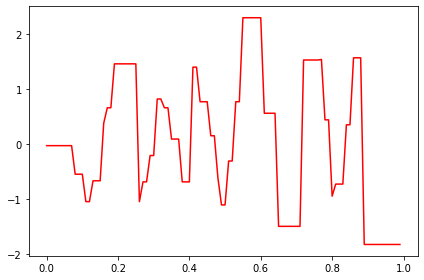

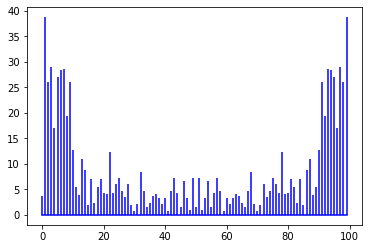

/Users/linjunting/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


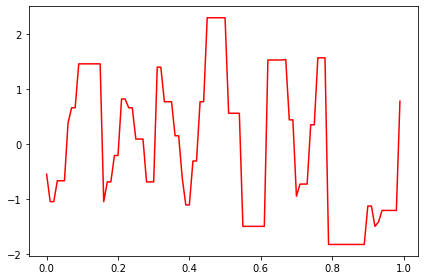

In [2]:
for i in range (0,20,10):
#     x=np.real(fft(data[start+(sr*i):start+((i+1)*sr),1]))
    x=(data[start+i:start+i+sr,1])
    X = fft(x)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 

#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
    Spectrum.append(np.abs(X))
#     plt.xlabel('Freq (Hz)', fontsize = 40, labelpad = 20)
#     plt.ylabel('FFT Amplitude |X(freq)|', fontsize = 40, labelpad = 20)
    plt.show()
#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.plot(t, ifft(X), 'r')
#     plt.xlabel('Time (s)', fontsize = 40, labelpad = 20)
#     plt.ylabel('Amplitude', fontsize = 40, labelpad = 20)
    plt.tight_layout()
    plt.show()

In [3]:
print(Spectrum)

[array([ 5.47      , 30.19882404, 20.01258234, 20.65734321, 23.35301353,
       29.78972657, 30.94110139, 34.49470366, 13.98032576, 21.65343036,
       15.71373546,  7.63885158,  3.13502537, 10.26926847,  8.85415894,
        3.90741558,  7.08544213,  4.52940981,  4.5494617 ,  4.20683956,
        5.3902306 ,  6.08916072, 11.33051165,  5.46793229,  4.69597619,
        7.16595423,  3.90655267,  1.55051913,  4.00401613,  4.19044072,
        2.3947271 ,  0.31065529,  8.6697391 ,  3.74454794,  2.52840116,
        3.1880685 ,  4.40297117,  2.30251242,  2.04377021,  2.10215623,
        2.29613025,  1.13487188,  6.2798473 ,  6.11475495,  3.55526184,
        2.23273677,  6.27260878,  2.95203754,  1.20296345,  7.22233118,
        0.49      ,  7.22233118,  1.20296345,  2.95203754,  6.27260878,
        2.23273677,  3.55526184,  6.11475495,  6.2798473 ,  1.13487188,
        2.29613025,  2.10215623,  2.04377021,  2.30251242,  4.40297117,
        3.1880685 ,  2.52840116,  3.74454794,  8.6697391 ,  0.3

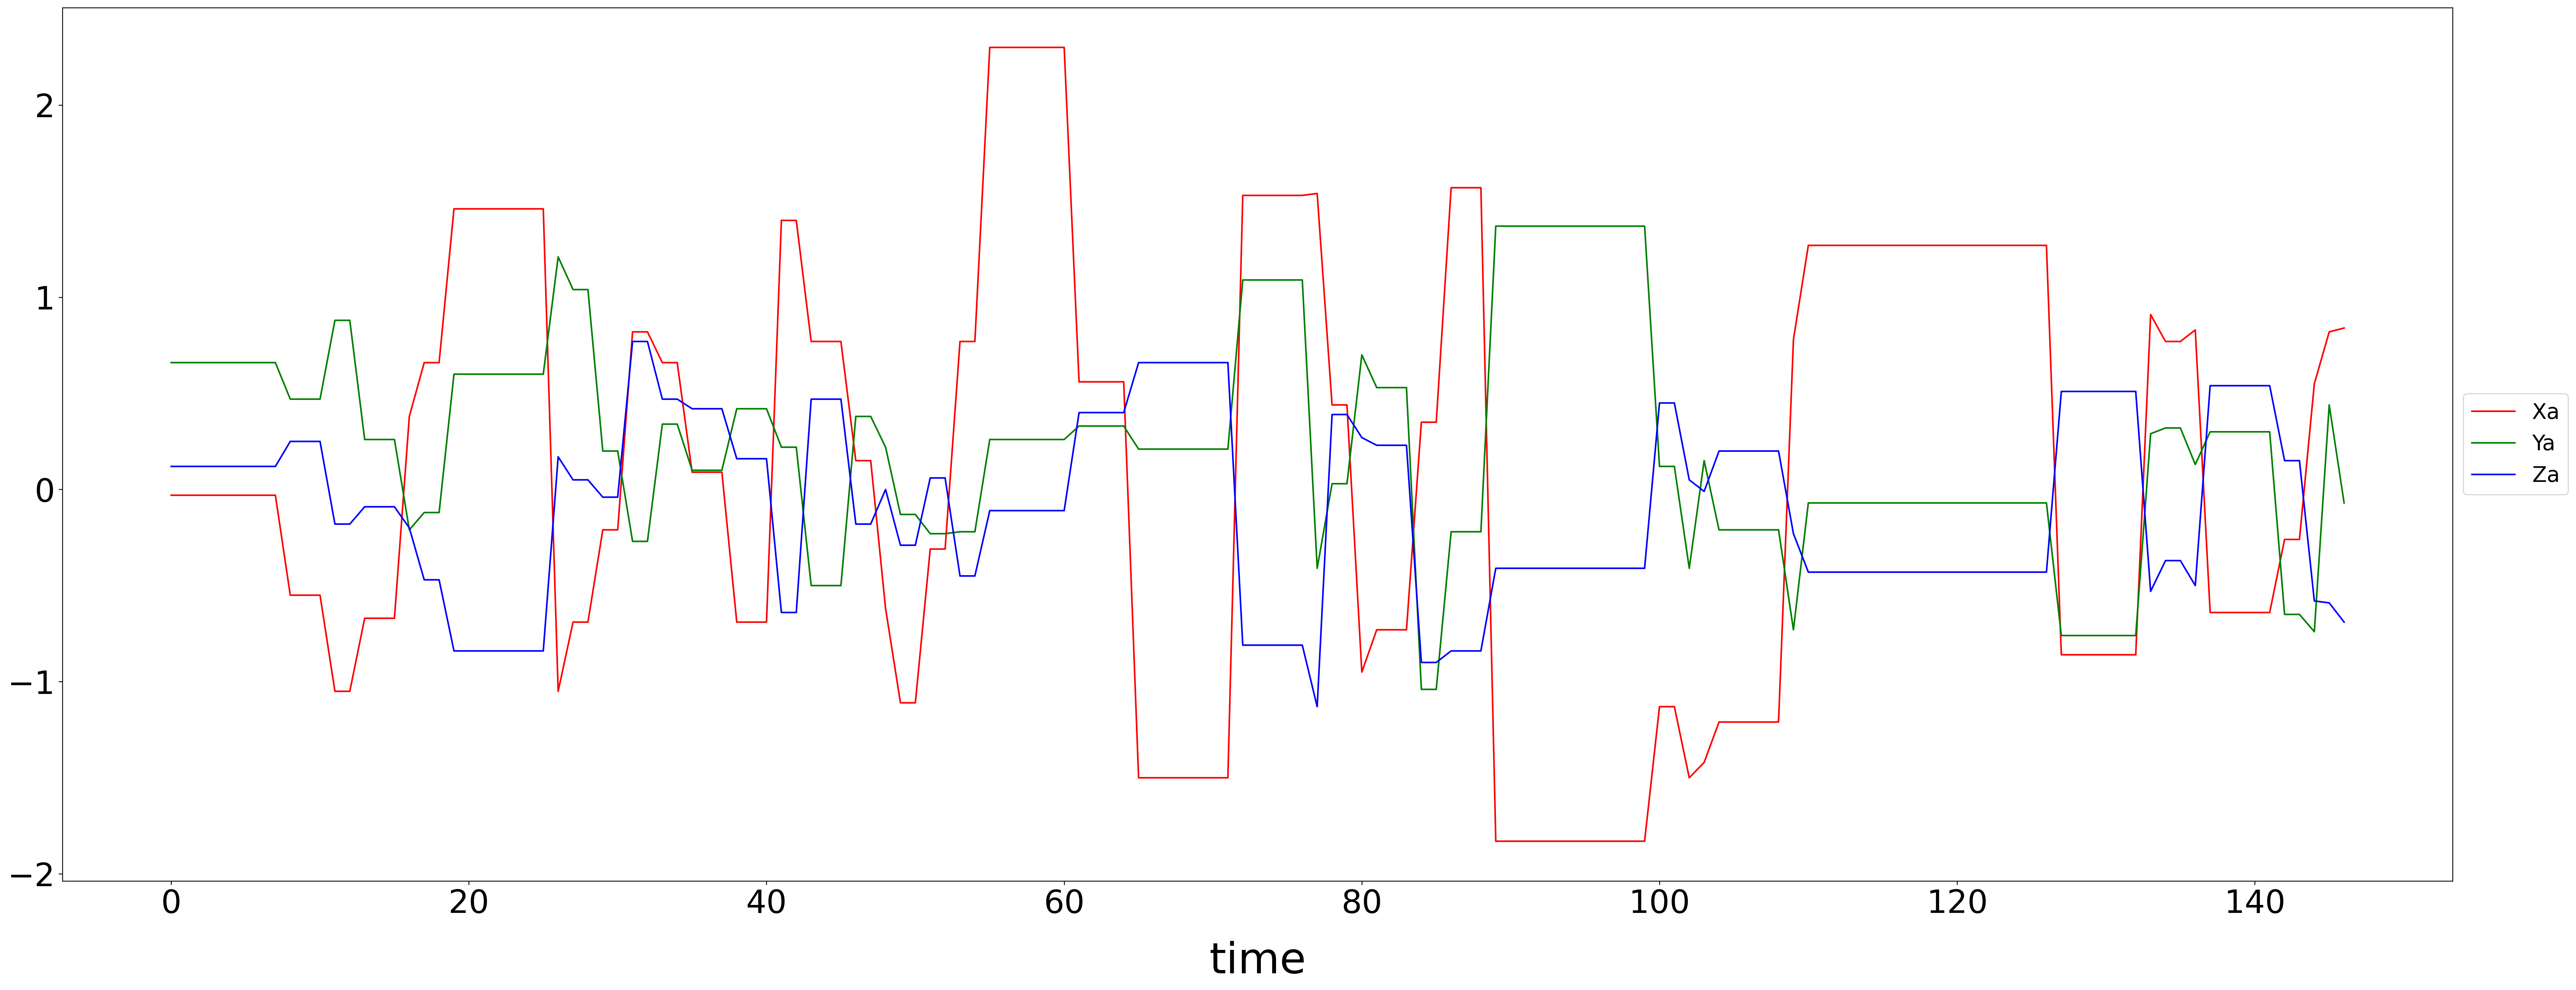

In [4]:
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(length, data[:,1], color = 'r', label = "Xa")
plt.plot(length, data[:,2], color = 'g', label = "Ya")
plt.plot(length, data[:,3], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

/var/folders/nn/k75mfp3946lf7jzz8pdhmkyr0000gn/T/ipykernel_18906/3958952588.py:14: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=147).
  plt.specgram(data[:,7],Fs=1,cmap='plasma')


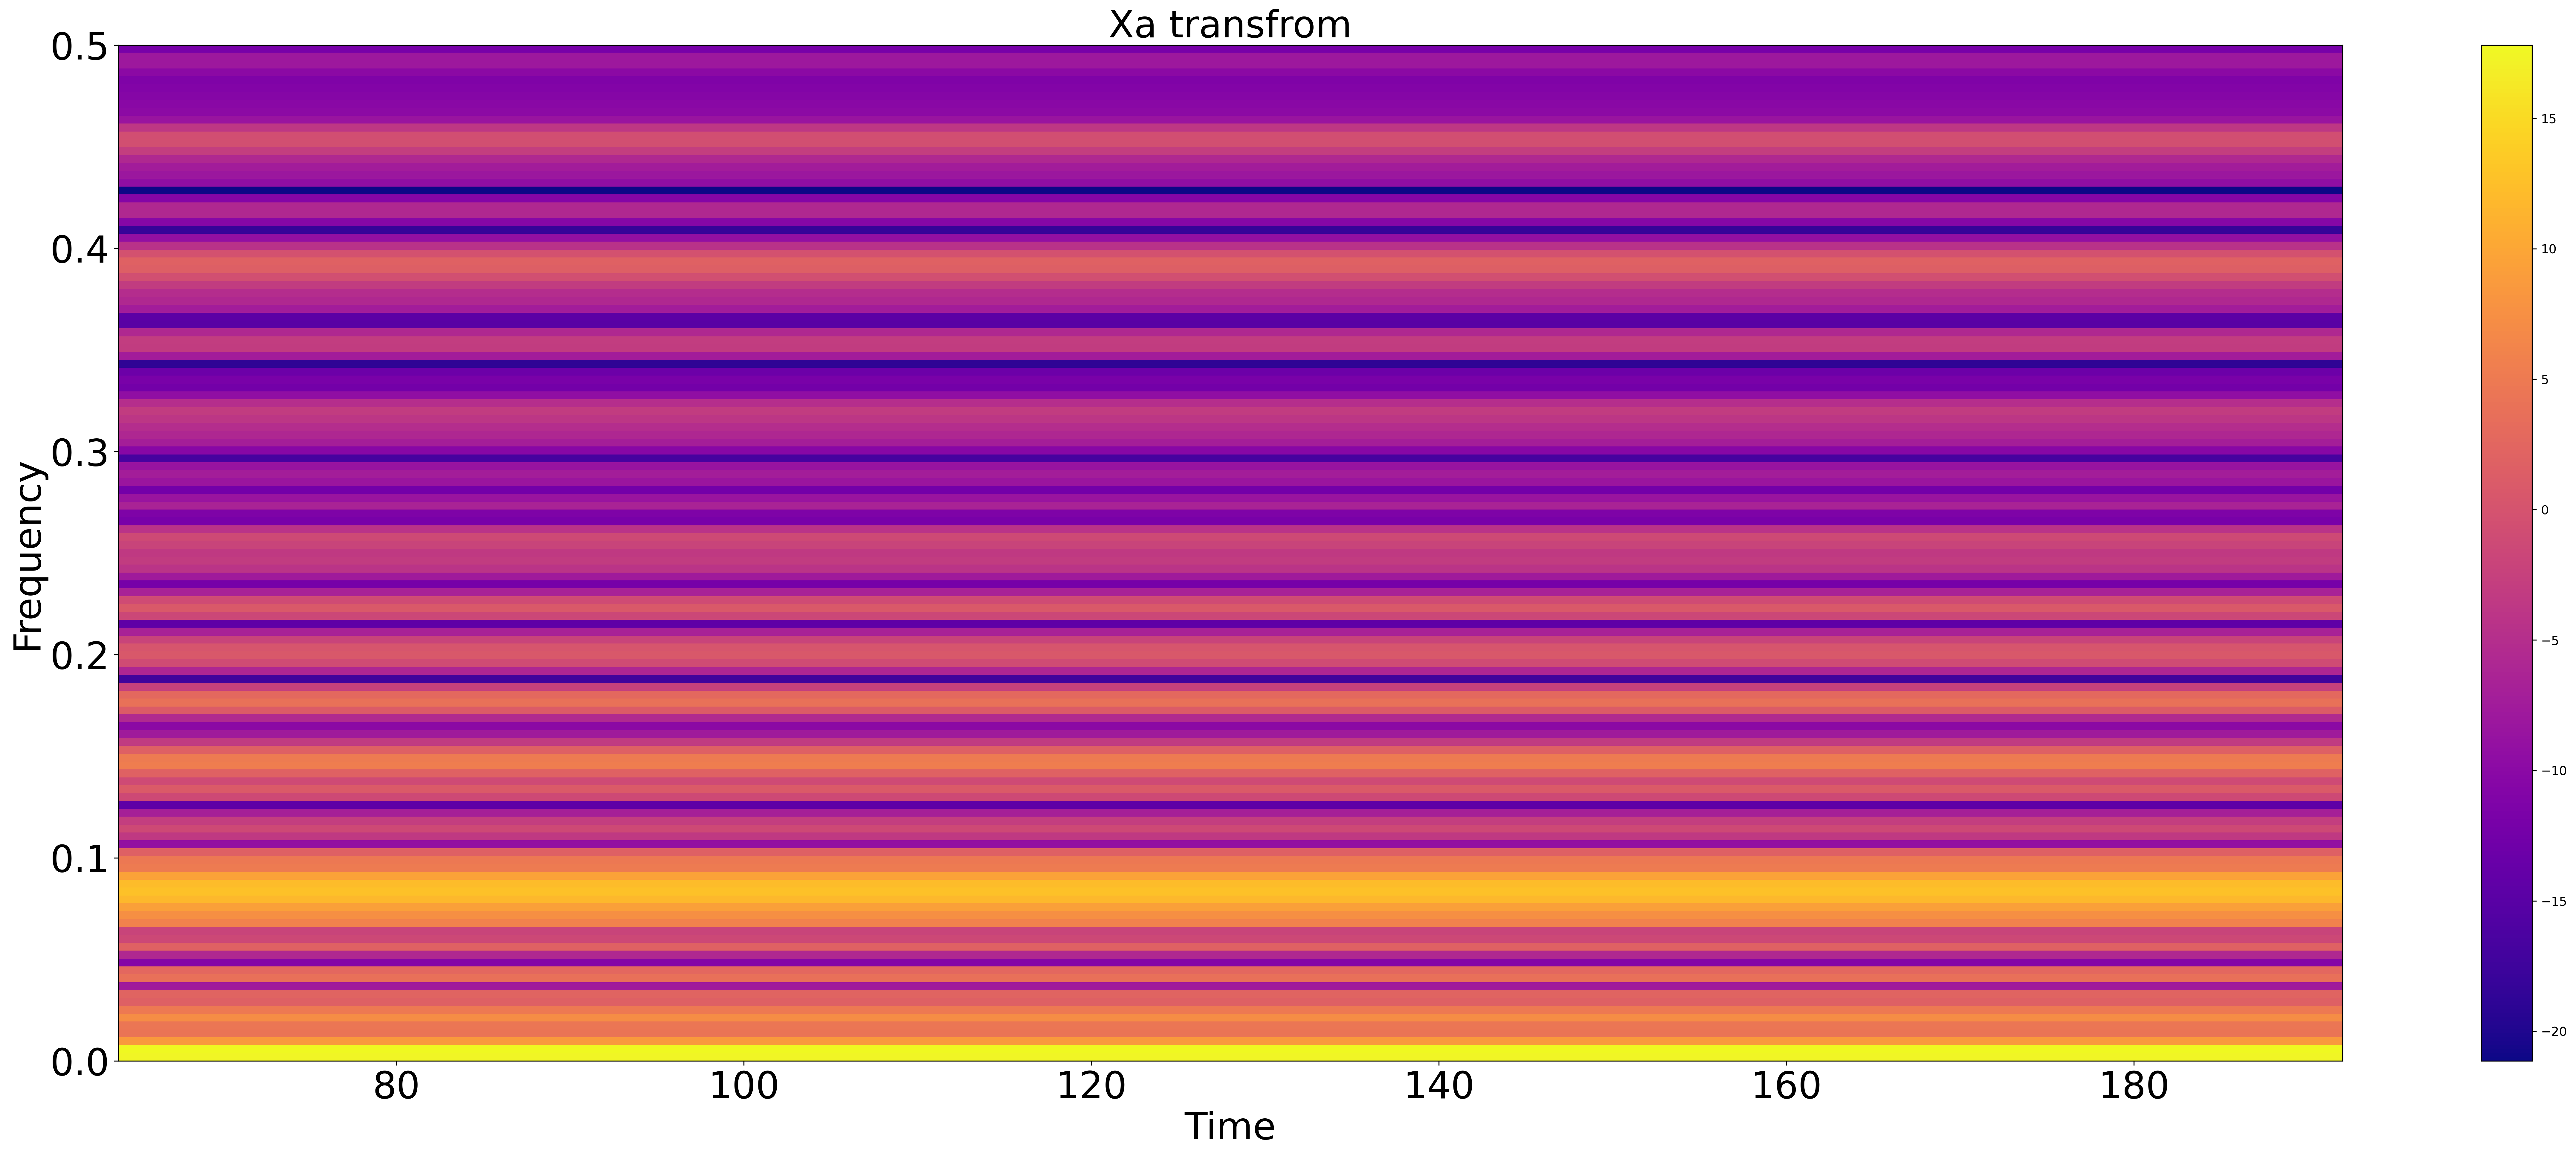

/var/folders/nn/k75mfp3946lf7jzz8pdhmkyr0000gn/T/ipykernel_18906/3958952588.py:24: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=147).
  plt.specgram(data[:,8])


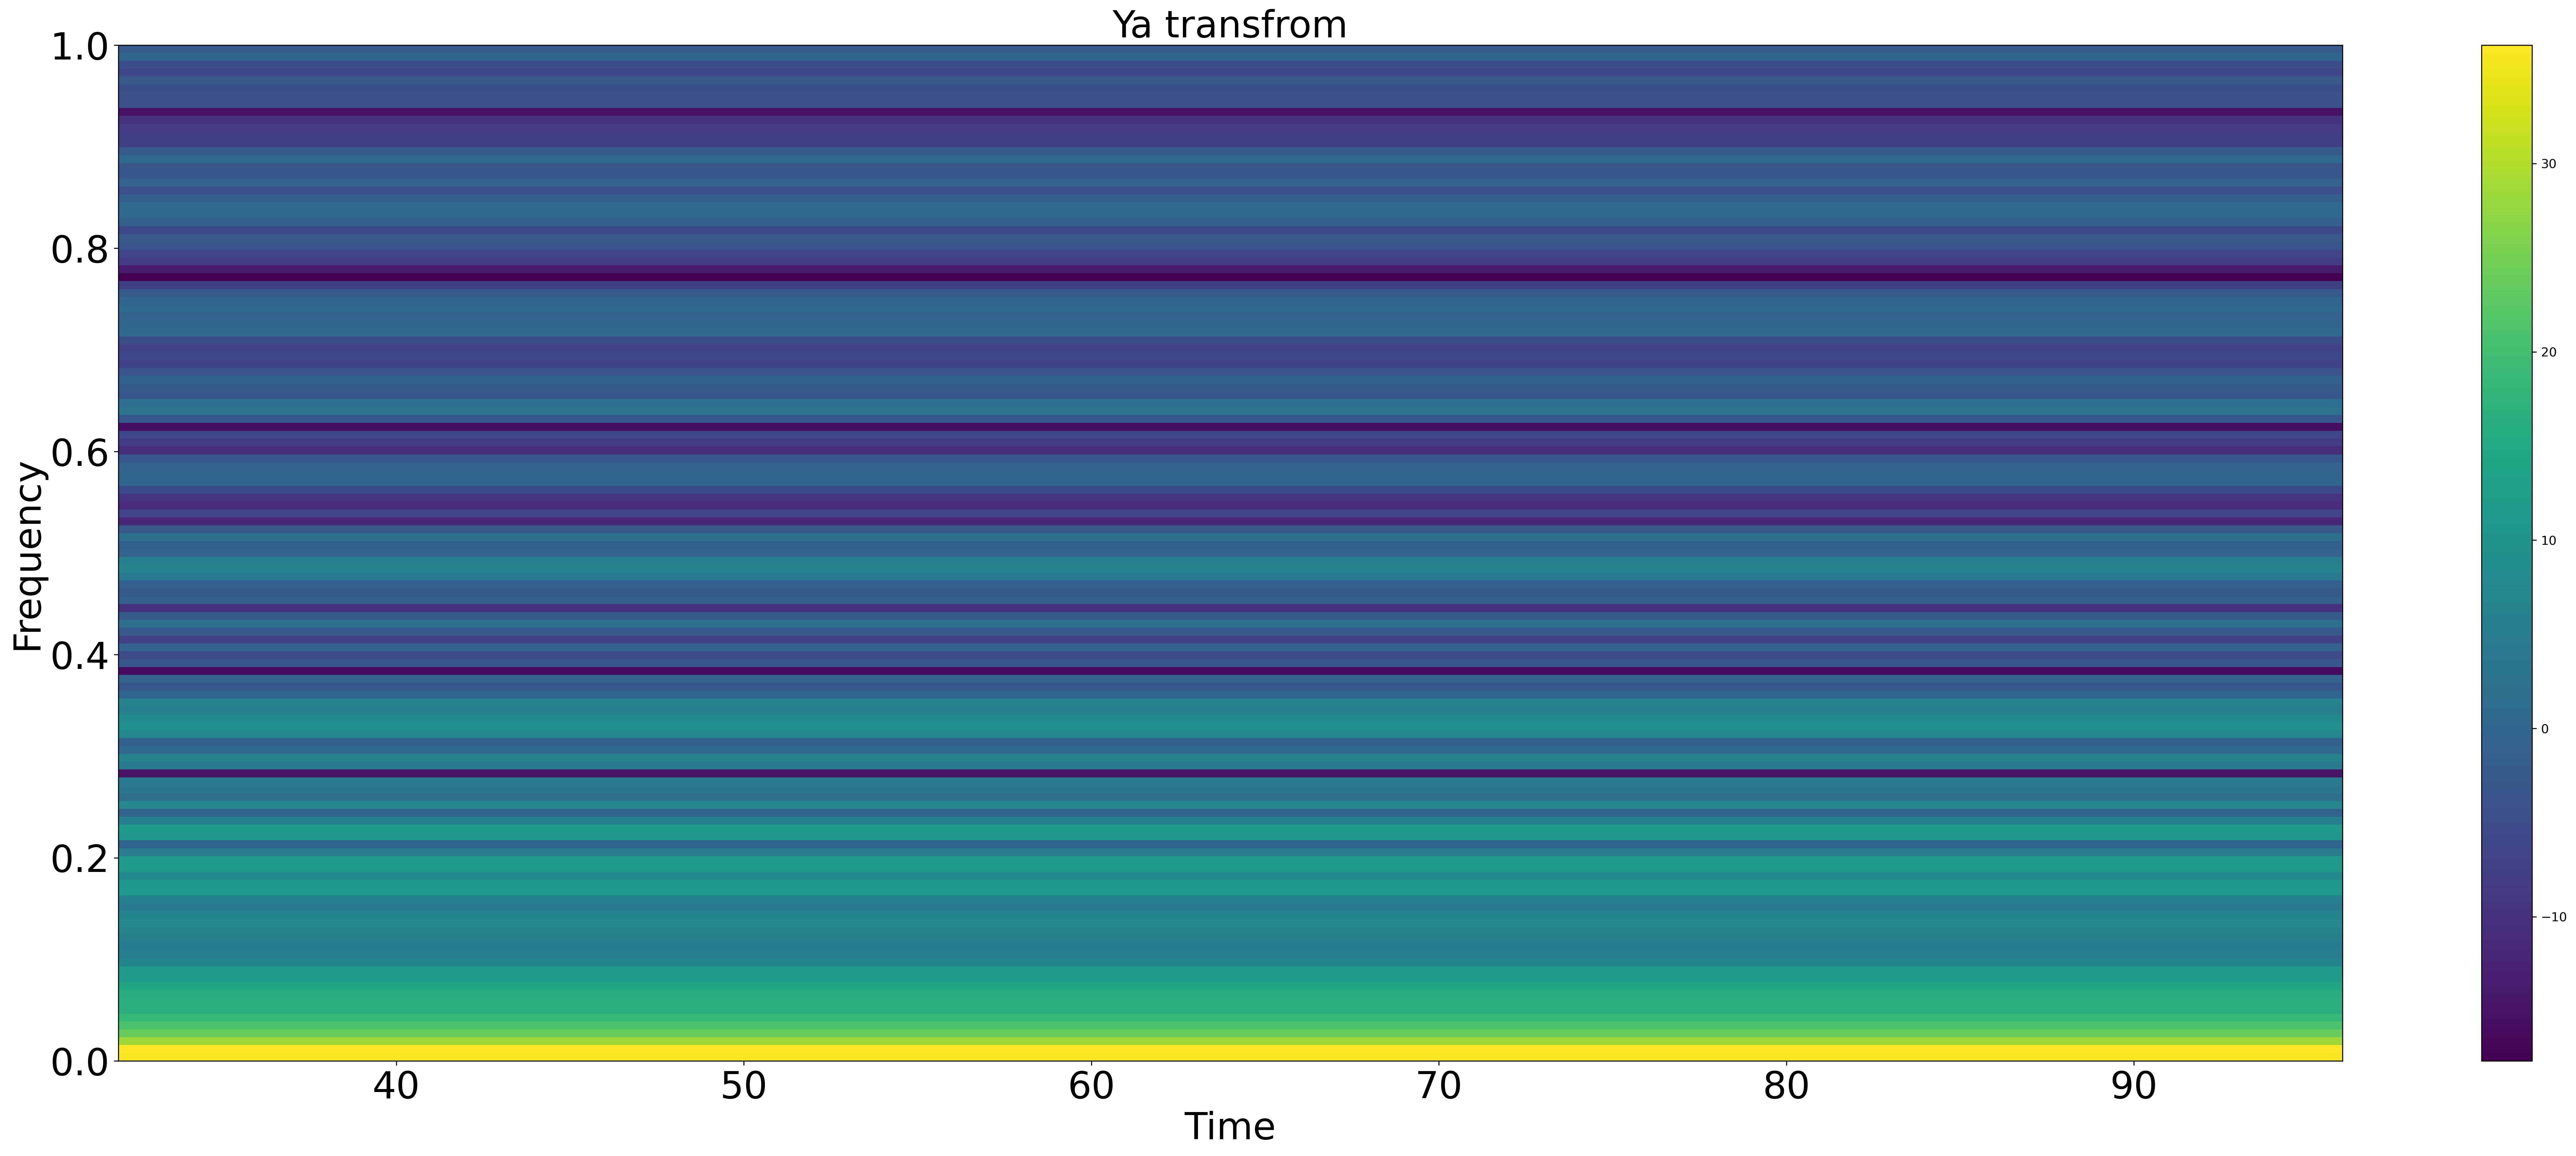

/var/folders/nn/k75mfp3946lf7jzz8pdhmkyr0000gn/T/ipykernel_18906/3958952588.py:34: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=147).
  plt.specgram(data[:,9])


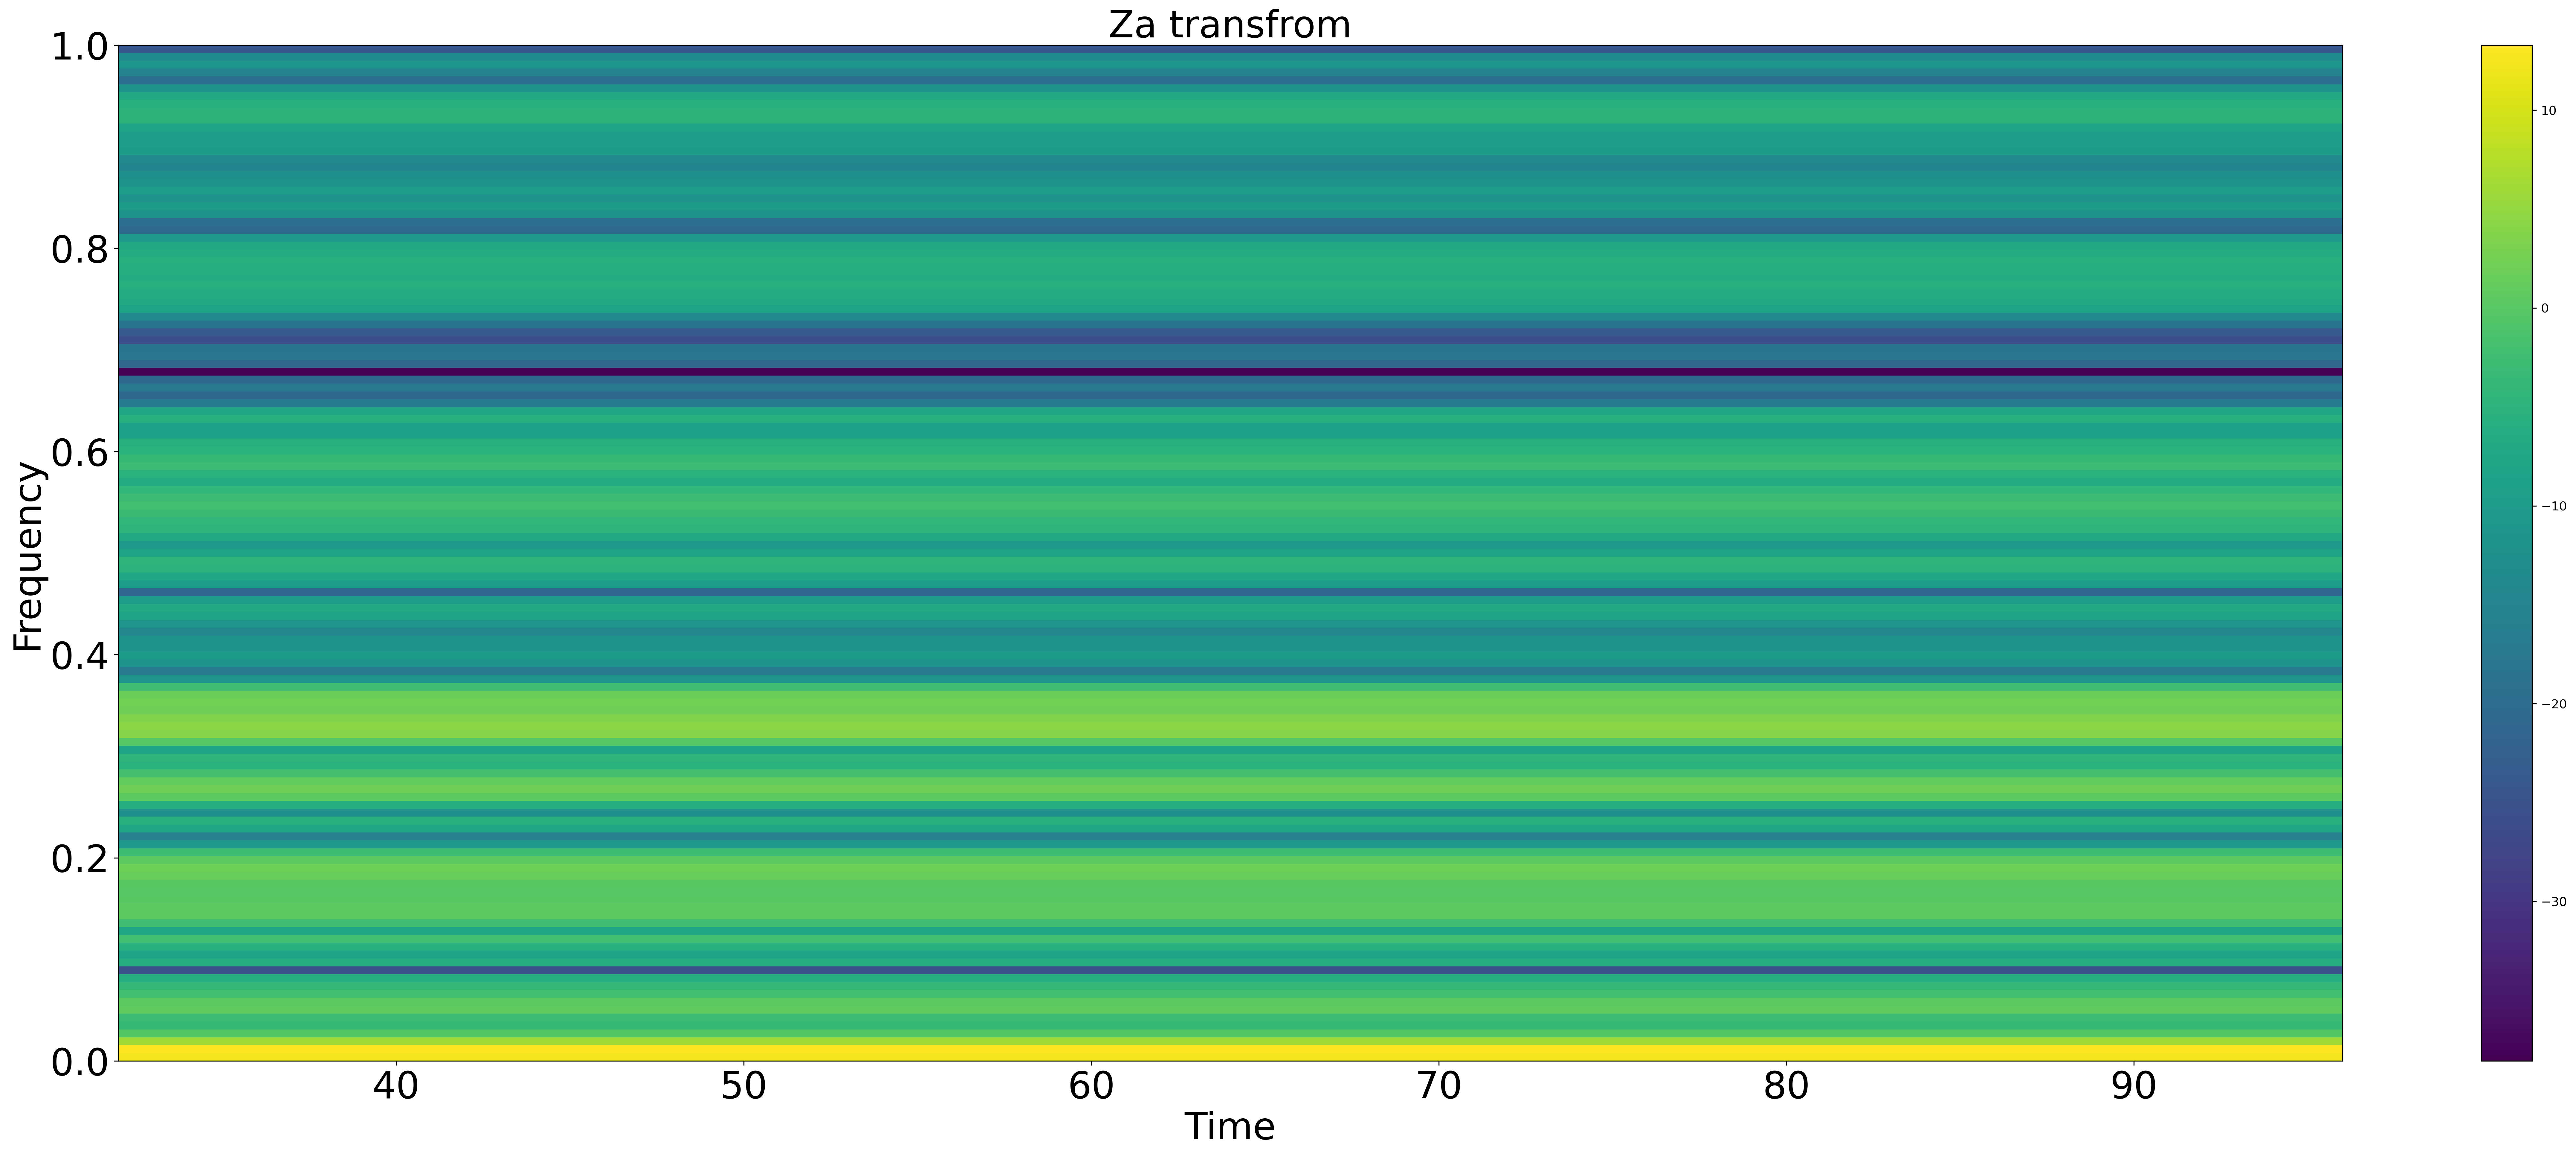

In [5]:
# plot_color_gradients('Sequential',
#                      ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])
# plot_color_gradients('Perceptually Uniform Sequential',
#                      ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Xa transfrom',fontsize = 30)  
plt.specgram(data[:,7],Fs=1,cmap='plasma')
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Ya transfrom',fontsize = 30)  
plt.specgram(data[:,8])
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Za transfrom',fontsize = 30)  
plt.specgram(data[:,9])
plt.colorbar()
plt.show()